# Stores Sales - Time Series Forcasting
Favorita datasets


In [11]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import date

In [8]:
# --- Configuration ---
# Define paths for raw input and processed output
DATA_DIR = Path("../data/raw")

# Load raw datasets
print("Loading data...")
df_train = pl.read_csv(DATA_DIR / "train.csv", try_parse_dates=True)
df_oil = pl.read_csv(DATA_DIR / "oil.csv", try_parse_dates=True)

print(f"Train Shape: {df_train.shape}")
print(f"Oil Shape: {df_oil.shape}")

# Preview the data
display(df_train.head())

Loading data...
Train Shape: (3000888, 6)
Oil Shape: (1218, 2)


id,date,store_nbr,family,sales,onpromotion
i64,date,i64,str,f64,i64
0,2013-01-01,1,"""AUTOMOTIVE""",0.0,0
1,2013-01-01,1,"""BABY CARE""",0.0,0
2,2013-01-01,1,"""BEAUTY""",0.0,0
3,2013-01-01,1,"""BEVERAGES""",0.0,0
4,2013-01-01,1,"""BOOKS""",0.0,0


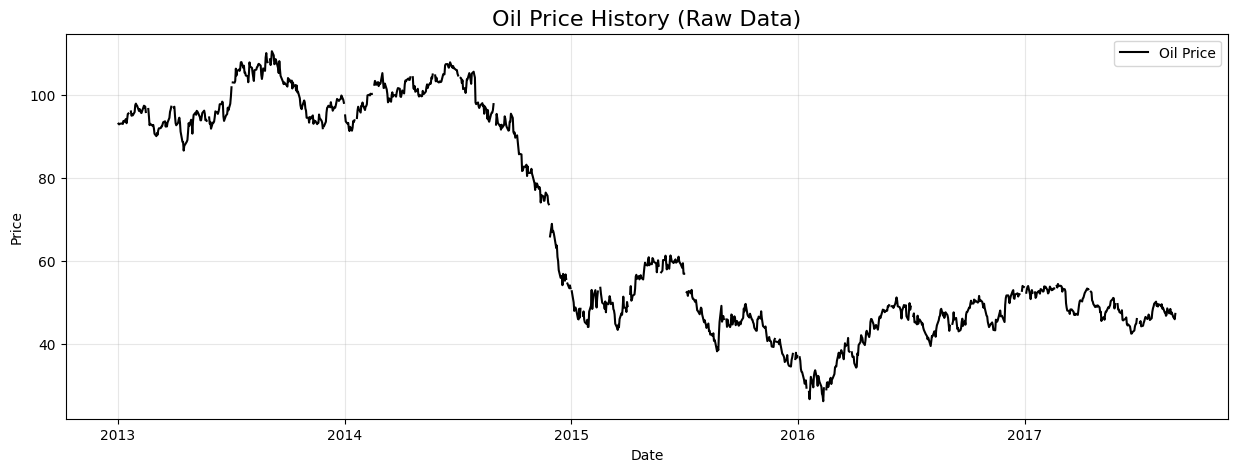

Number of missing oil prices: 43


In [ ]:
# Setup plot style
plt.figure(figsize=(15, 5))
plt.title("Oil Price History (Raw Data)", fontsize=16)

# Convert to pandas for plotting (Matplotlib works natively with Pandas/Numpy)
# .to_pandas() is cheap here because oil data is small
pdf_oil = df_oil.to_pandas()

plt.plot(pdf_oil['date'], pdf_oil['dcoilwtico'], label='Oil Price', color='black')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Check for null values explicitly
null_count = df_oil["dcoilwtico"].null_count()
print(f"Number of missing oil prices: {null_count}")

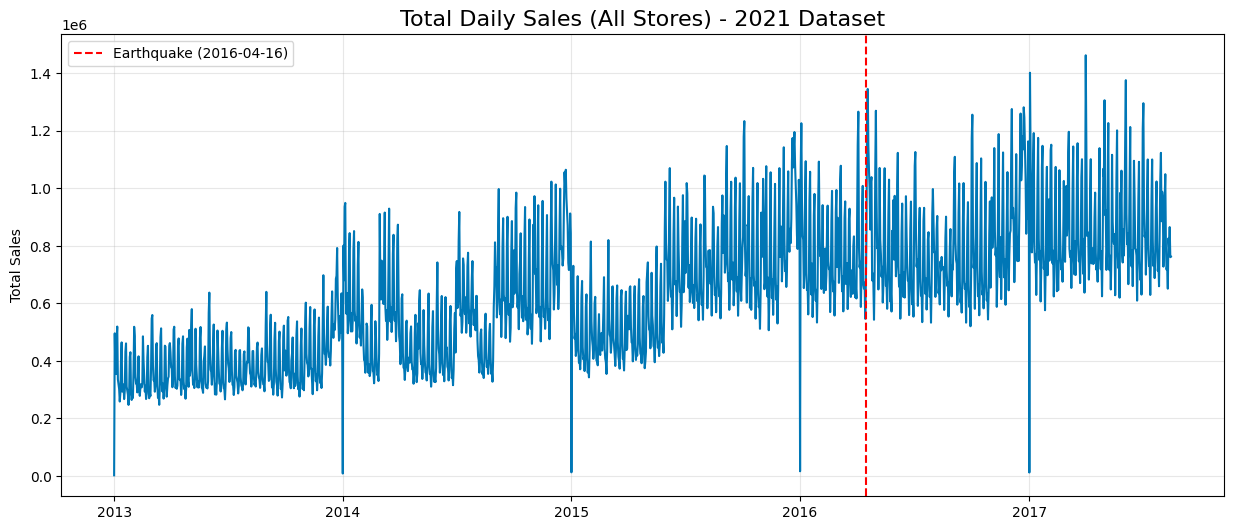

In [12]:
# Aggregate total sales by date
daily_sales = (
    df_train
    .group_by("date")
    .agg(pl.col("sales").sum().alias("total_sales"))
    .sort("date")
)

# Plotting
plt.figure(figsize=(15, 6))

plt.plot(daily_sales["date"].to_list(), daily_sales["total_sales"].to_list(), color='#0077b6')

plt.title("Total Daily Sales (All Stores) - 2021 Dataset", fontsize=16)

plt.axvline(x=date(2016, 4, 16), color='red', linestyle='--', label='Earthquake (2016-04-16)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.ylabel("Total Sales")
plt.show()